In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt 
from glob import glob
from sklearn.model_selection import train_test_split
import os
import json
import cv2

In [3]:
images_path = glob('./user/CK+48/*/*')
images_path[:10]

['./user/CK+48/surprise/S032_001_00000022.png',
 './user/CK+48/surprise/S131_001_00000014.png',
 './user/CK+48/surprise/S056_003_00000009.png',
 './user/CK+48/surprise/S022_001_00000029.png',
 './user/CK+48/surprise/S051_002_00000019.png',
 './user/CK+48/surprise/S099_001_00000014.png',
 './user/CK+48/surprise/S071_001_00000012.png',
 './user/CK+48/surprise/S037_001_00000019.png',
 './user/CK+48/surprise/S042_001_00000017.png',
 './user/CK+48/surprise/S066_002_00000022.png']

In [5]:
y = [os.path.basename(os.path.dirname(path)) for path in images_path]
y[:10]

['surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise',
 'surprise']

In [6]:
train_path, valid_path, y_train, y_valid = train_test_split(images_path, y, test_size = 0.9, 
                                                            train_size = 0.1, stratify = y, 
                                                            random_state = 42)
len(train_path)

92

In [7]:
model = {}
model['emotion'] = DeepFace.build_model('Emotion')

In [9]:
df = []
count = 0
for path in train_path[:20]:
    try:
        df.append(DeepFace.analyze(path, actions=['emotion'], detector_backend='dlib')['dominant_emotion'])
    except:
        count+=1
        df.append(-1)
print(f'\n\n\n-----Số lượng hình ảnh detecFace error: {count}')

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded
Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /home/anh/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2
5.71MB [00:29, 195kB/s] 



-----Số lượng hình ảnh detecFace error: 0


In [10]:
def one_hot_encode(dataframe:list):
    dict_emotion = {'angry':1, 'anger':1, 'disgust':2, 
                    'fear':3, 'happy':4, 
                    'sadness':5, 'sad': 5, 
                    'surprise':6, 'neutral':0}
    result = []
    for i in range(len(dataframe)):
        if type(dataframe[i])  != int:
            result.append(dict_emotion[dataframe[i]])
    return result

In [11]:
df_ = one_hot_encode(df)
y_train_ = one_hot_encode(y_train[:20])

In [12]:
df_[:10], y_train_[:10]

([1, 0, 6, 0, 6, 0, 1, 2, 0, 2], [2, 3, 6, 2, 6, 5, 2, 2, 6, 2])

In [13]:
from sklearn.metrics import accuracy_score
from PIL import Image

In [14]:
accuracy_score(y_train_, df_)

0.45

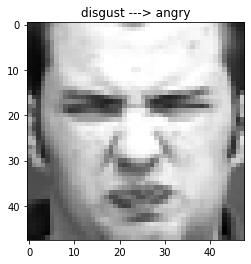

---------------1----------------




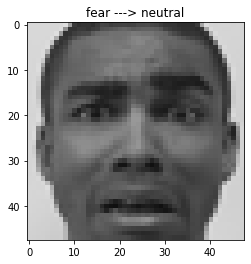

---------------2----------------




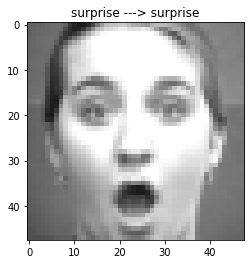

---------------3----------------




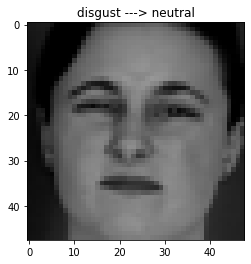

---------------4----------------




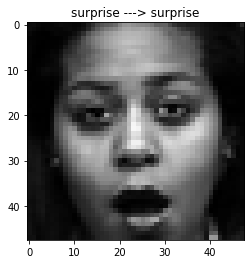

---------------5----------------




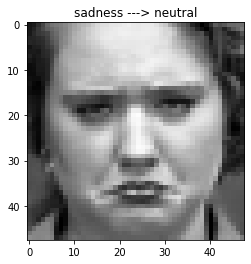

---------------6----------------




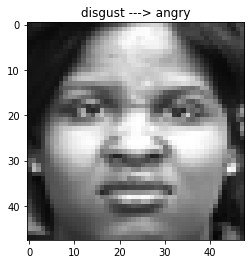

---------------7----------------




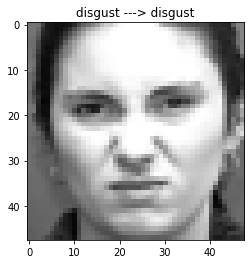

---------------8----------------




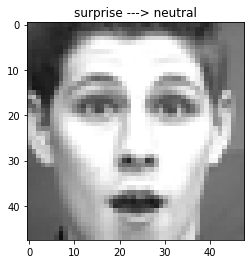

---------------9----------------




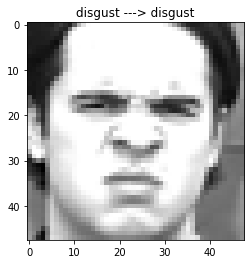

---------------10----------------




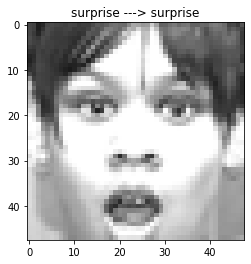

---------------11----------------




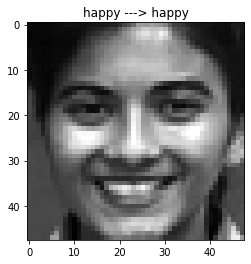

---------------12----------------




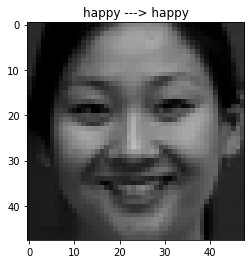

---------------13----------------




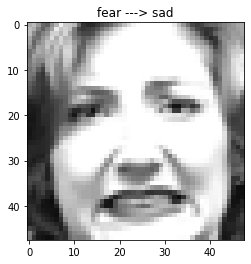

---------------14----------------




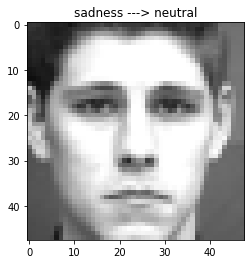

---------------15----------------




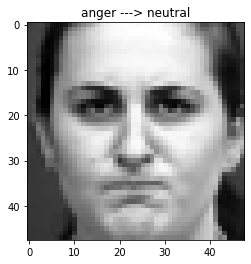

---------------16----------------




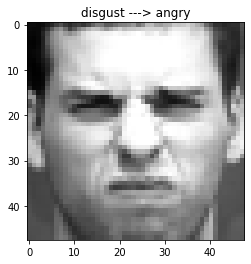

---------------17----------------




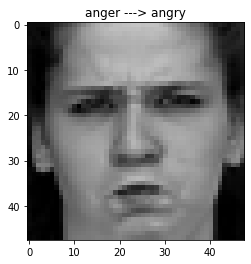

---------------18----------------




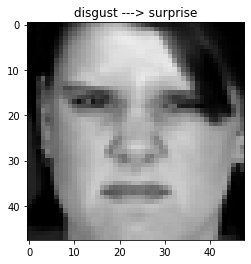

---------------19----------------




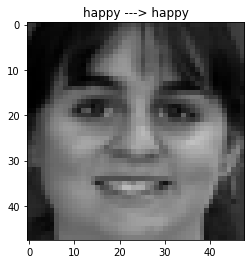

---------------20----------------




In [15]:
f = plt.figure()
for i in range(20):
    f.add_subplot(1,1,1)
    plt.imshow(cv2.imread(train_path[i]))
    plt.title(f'{y_train[i]} ---> {df[i]}')
    plt.show(block=True)
    print(f'---------------{i+1}----------------\n\n')